# ML Project Group Ivo, Salvo, Kevin

Kickstarter Project

## About Dataset
Kickstarter is a popular crowdfunding platform that has helped thousands of entrepreneurs and creators bring their innovative ideas to life. However, not all Kickstarter projects are successful, and understanding the factors that contribute to success or failure can be valuable for both creators and investors alike.

In this dataset, we have collected information on a large number of Kickstarter projects and whether they ultimately succeeded or failed to meet their funding goals. This dataset includes a wide range of project types, including technology startups, creative arts endeavors, and social impact initiatives, among others.

By analyzing this dataset, researchers and analysts can gain insights into the characteristics of successful and unsuccessful Kickstarter projects, such as funding targets, project categories, and funding sources. This information can be used to inform investment decisions and guide future crowdfunding campaigns.

Overall, this dataset provides a comprehensive look at the Kickstarter ecosystem and can serve as a valuable resource for anyone interested in understanding the dynamics of crowdfunding and the factors that contribute to project success or failure.

### Assumptions About the Data : 

**ID** Can be dropped or transformed - 

**Name** - maybe length of the name can be an indicator of how successfull it is founded - can be dropped initaly - no learing effect for model

**Category** - seems reasonable - keep

**Subcategorory** - every subcategory can be assigned to a Category - maybe drop for first analysis - "maybe hotencode subcategory and category"

**Country** - Self Explained - keep

**Launched** - how long are projects in "funding" ? - cut timestamp only keep date - keep

**Deadline** - maybe make prediction about how long it max takes for a project to be successfully funded ? - keep

**Goal**  drop NaN/Zero Values -> goal automatically reached at 0 / maybe cut outliers  / threshold maybe at 100/1000ish - keep

**Pledged** - always successfull when > goal - always "live" when deadline not met and < goal - always failed when < goal and deadline done - correaltes with state (target) column - keep

**Backers** - maybe not that relevant / shows popularity / - keep for now for further analysis ( might be dropped later)

**State** - Feature - keep



In [2]:
#load the data
import pandas as pd
data = pd.read_csv('data/kickstarter_projects.csv')

In [3]:
data.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [4]:
#check for missing values

data.isnull().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [5]:
#check data types
data.dtypes

ID              int64
Name           object
Category       object
Subcategory    object
Country        object
Launched       object
Deadline       object
Goal            int64
Pledged         int64
Backers         int64
State          object
dtype: object

In [6]:
#check unique values in "categories" column
data['Category'].unique()

array(['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism',
       'Publishing', 'Theater', 'Music', 'Photography', 'Games', 'Design',
       'Food', 'Crafts', 'Comics', 'Dance'], dtype=object)

In [7]:
#check unique values in "SubCategory" column
data['Subcategory'].unique()

array(['Fashion', 'Shorts', 'Illustration', 'Software', 'Journalism',
       'Fiction', 'Theater', 'Rock', 'Photography', 'Puzzles',
       'Graphic Design', 'Film & Video', 'Publishing', 'Documentary',
       'Sculpture', 'Electronic Music', 'Nonfiction', 'Food', 'Painting',
       'Indie Rock', 'Video Games', 'Public Art', 'Product Design', 'Art',
       "Children's Books", 'Crafts', 'Jazz', 'Music', 'Comics',
       'Narrative Film', 'Tabletop Games', 'Digital Art', 'Animation',
       'Conceptual Art', 'Pop', 'Hip-Hop', 'Country & Folk',
       'Periodicals', 'Webseries', 'Performance Art', 'Technology',
       'Art Books', 'World Music', 'Knitting', 'Classical Music',
       'Poetry', 'Graphic Novels', 'Radio & Podcasts', 'Design',
       'Hardware', 'Webcomics', 'Dance', 'Translations', 'Crochet',
       'Games', 'Photo', 'Mixed Media', 'Space Exploration', 'Photobooks',
       'Musical', 'Audio', 'Community Gardens', 'R&B',
       'Fabrication Tools', 'Textiles', 'Architecture',

In [8]:
#count unique values in "Subcategory" column
data['Subcategory'].nunique()

159

In [9]:
# range of the "Goal" column
data['Goal'].min(), data['Goal'].max()

(0, 166361391)

## First styling of the Dataset 
DROP ID and Timespam in "launched"

In [10]:
#drop ID Column    
data = data.drop(columns=['ID'])

In [11]:
#drop timestamp in "launched" column
data['Launched'] = pd.to_datetime(data['Launched']).dt.normalize()
data['Launched']
data['Deadline'] = pd.to_datetime(data['Deadline']).dt.normalize()
data['Deadline']

0        2009-05-31
1        2009-07-20
2        2009-05-03
3        2009-07-14
4        2009-05-26
            ...    
374848   2018-01-16
374849   2018-02-09
374850   2018-01-16
374851   2018-02-01
374852   2018-01-26
Name: Deadline, Length: 374853, dtype: datetime64[ns]

## Modeling baseline Dataset and Advaned Dataset

In [12]:
#create 2 different dataframes for a baseline model and an advanced model
baseline_data = data.copy()
advanced_data = data.copy()

In [13]:
# drop subcategory column for baseline model
baseline_data = baseline_data.drop(columns=['Subcategory'])
#drop backers in baseline model 
baseline_data = baseline_data.drop(columns=['Backers'])

In [14]:
baseline_data.head()

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,United States,2009-04-21,2009-05-31,1000,625,Failed
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,United States,2009-04-23,2009-07-20,80000,22,Failed
2,drawing for dollars,Art,United States,2009-04-24,2009-05-03,20,35,Successful
3,Offline Wikipedia iPhone app,Technology,United States,2009-04-25,2009-07-14,99,145,Successful
4,Pantshirts,Fashion,United States,2009-04-27,2009-05-26,1900,387,Failed


In [15]:
#nunique values in state column
baseline_data['State'].value_counts()

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [16]:
baseline_data.Country.value_counts()

Country
United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: count, dtype: int64

# EDA of Baseline Dataset

What to find out? 

- Category encoding - open
- Country encoding - Imbalance 70% USA? - open
- State Encoding - open
- Do we use the column "Names" and if yes, how? - open
- Project duration based on columns "Launched" und "Deadline" - Done -> created new column 'Project_Duration'
- Goal_Fulfillments - created new column based on column "Goal" und "Pledged"

---

- when goal 0 = successfull ? -> cut - Done
- "Canceled" state cuttable? - not cuttable
- Goal Threshold? - Done --> no threshold
- Suspended why? - Done -> dataframe was cut
- more successfull in country x? - Done -> different dependent on country -> kept column
- Top 10% Goals Failed or Successful? - Done
- Years with higher/lower successrates? -> Done -> relative similar rates -> not further relevant and therefore, dropped columns 'Launched' and 'Deadline'

In [17]:
#check for duplicates
baseline_data.duplicated().sum()

#show both duplicate rows
baseline_data[baseline_data.duplicated(keep=False)]

#drop duplicates for both datasets
baseline_data = baseline_data.drop_duplicates()
advanced_data = advanced_data.drop_duplicates()

In [18]:
#check if duplicates are dropped
baseline_data.duplicated().sum()

0

In [19]:
# check if duplicates are dropped
advanced_data.duplicated().sum()

0

In [20]:
baseline_data["State"].value_counts(normalize=True)

State
Failed        0.527168
Successful    0.357079
Canceled      0.103375
Live          0.007464
Suspended     0.004914
Name: proportion, dtype: float64

In [21]:
baseline_data["Country"].value_counts(normalize=True)

Country
United States     0.780619
United Kingdom    0.089825
Canada            0.039365
Australia         0.020912
Germany           0.011127
France            0.007840
Italy             0.007678
Netherlands       0.007651
Spain             0.006072
Sweden            0.004687
Mexico            0.004674
New Zealand       0.003860
Denmark           0.002969
Ireland           0.002164
Switzerland       0.002027
Norway            0.001889
Hong Kong         0.001649
Belgium           0.001646
Austria           0.001593
Singapore         0.001481
Luxembourg        0.000165
Japan             0.000107
Name: proportion, dtype: float64

<Axes: xlabel='Country'>

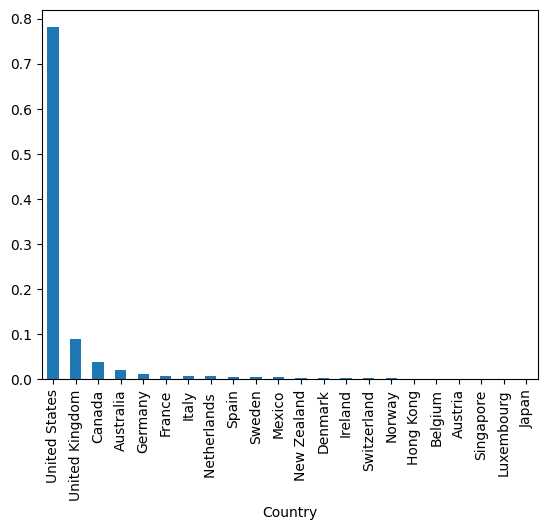

In [22]:
# Plot distribution of column 'Country' in percent
baseline_data["Country"].value_counts(normalize=True).plot(kind="bar")

In [23]:
# show rows with zero in goal column
baseline_data[baseline_data['Goal'] == 0]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State
1085,LOVELAND Round 6: A Force More Powerful,Art,United States,2009-11-25,2009-12-04,0,100,Successful
33831,"Word-of-mouth publishing: get ""Corruptions"" ou...",Publishing,United States,2011-11-07,2011-12-13,0,0,Canceled
40294,Nana,Film & Video,United States,2012-01-25,2012-03-16,0,0,Failed
316197,Bug's Big Adventure: Mexico Edition,Art,Mexico,2016-11-11,2016-11-12,0,16,Successful


In [24]:
# get rows with goal less than 100
baseline_data[baseline_data['Goal'] < 100]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State
2,drawing for dollars,Art,United States,2009-04-24,2009-05-03,20,35,Successful
3,Offline Wikipedia iPhone app,Technology,United States,2009-04-25,2009-07-14,99,145,Successful
48,Mr. Squiggles,Art,United States,2009-05-12,2009-05-22,30,0,Failed
88,Comic Remix,Comics,United States,2009-05-30,2009-06-15,60,72,Successful
338,"Video chat at 35,000 Feet",Film & Video,United States,2009-08-28,2009-08-31,12,19,Successful
...,...,...,...,...,...,...,...,...
374590,"I will draw you, normal edit or grime edit",Art,United States,2017-12-29,2018-02-27,50,4,Live
374661,Too Many Hours,Art,New Zealand,2017-12-30,2018-01-29,36,193,Live
374785,28mm Terrain for Tabletop Gaming,Games,United States,2018-01-01,2018-01-31,50,0,Live
374818,Make Earth Great Again #MEGA,Journalism,United States,2018-01-02,2018-01-26,17,27,Live


Roughly 1% of the total data has a goal smaller than 100 USD

In [25]:
# implement new column "Goal_Fulfillment" as a percentage for both datasets
baseline_data['Goal_Fulfillment'] = ((baseline_data['Pledged'] / baseline_data['Goal']) * 100).round(2)
advanced_data['Goal_Fulfillment'] = ((advanced_data['Pledged'] / advanced_data['Goal']) * 100).round(2)
baseline_data.head()

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,United States,2009-04-21,2009-05-31,1000,625,Failed,62.50
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,United States,2009-04-23,2009-07-20,80000,22,Failed,0.03
2,drawing for dollars,Art,United States,2009-04-24,2009-05-03,20,35,Successful,175.00
3,Offline Wikipedia iPhone app,Technology,United States,2009-04-25,2009-07-14,99,145,Successful,146.46
4,Pantshirts,Fashion,United States,2009-04-27,2009-05-26,1900,387,Failed,20.37


In [26]:
# also check advanced data
advanced_data.head()

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Goal_Fulfillment
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed,62.50
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed,0.03
2,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful,175.00
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful,146.46
4,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed,20.37


In [27]:
# add new column "Project_Duration_Days" for both datasets
baseline_data['Project_Duration_Days'] = (baseline_data['Deadline'] - baseline_data['Launched']).dt.days
advanced_data['Project_Duration_Days'] = (advanced_data['Deadline'] - advanced_data['Launched']).dt.days
baseline_data.head()

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,United States,2009-04-21,2009-05-31,1000,625,Failed,62.50,40
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,United States,2009-04-23,2009-07-20,80000,22,Failed,0.03,88
2,drawing for dollars,Art,United States,2009-04-24,2009-05-03,20,35,Successful,175.00,9
3,Offline Wikipedia iPhone app,Technology,United States,2009-04-25,2009-07-14,99,145,Successful,146.46,80
4,Pantshirts,Fashion,United States,2009-04-27,2009-05-26,1900,387,Failed,20.37,29


In [28]:
# check advanced data
advanced_data.head()

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Goal_Fulfillment,Project_Duration_Days
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed,62.50,40
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed,0.03,88
2,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful,175.00,9
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful,146.46,80
4,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed,20.37,29


In [29]:
# check numerical columns statistics
baseline_data.describe()

,Launched,Deadline,Goal,Pledged,Goal_Fulfillment,Project_Duration_Days
count,374850,374850,3.748500e+05,3.748500e+05,374848.00,374850.000000
mean,2014-09-25 22:44:08.240096256,2014-10-30 03:56:52.840335616,4.586414e+04,9.121146e+03,inf,34.217183
min,2009-04-21 00:00:00,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.00,1.000000
25%,2013-04-30 00:00:00,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,0.46,30.000000
50%,2014-12-02 00:00:00,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,13.43,30.000000
75%,2016-03-29 00:00:00,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,106.52,37.000000
max,2018-01-02 00:00:00,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,inf,92.000000
std,NaN,NaN,1.158783e+06,9.132090e+04,NaN,12.804846


In [30]:
# show inf values in "Goal_Fulfillment" column
baseline_data[baseline_data['Goal_Fulfillment'] == float('inf')]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
1085,LOVELAND Round 6: A Force More Powerful,Art,United States,2009-11-25,2009-12-04,0,100,Successful,inf,9
316197,Bug's Big Adventure: Mexico Edition,Art,Mexico,2016-11-11,2016-11-12,0,16,Successful,inf,1


In [31]:
# get rid of rows with inf/NA values in "Goal_Fulfillment" column
baseline_data = baseline_data[(baseline_data['Goal_Fulfillment'] != float('inf')) & (baseline_data['Goal_Fulfillment'].notna())]
advanced_data = advanced_data[(advanced_data['Goal_Fulfillment'] != float('inf')) & (advanced_data['Goal_Fulfillment'].notna())]

In [32]:
# check descriptive statistics again
baseline_data.describe()

,Launched,Deadline,Goal,Pledged,Goal_Fulfillment,Project_Duration_Days
count,374846,374846,3.748460e+05,3.748460e+05,3.748460e+05,374846.000000
mean,2014-09-25 22:55:43.824397568,2014-10-30 04:08:37.614166784,4.586463e+04,9.121243e+03,3.222265e+02,34.217289
min,2009-04-21 00:00:00,2009-05-03 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,2013-04-30 00:00:00,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,4.600000e-01,30.000000
50%,2014-12-02 00:00:00,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,1.343000e+01,30.000000
75%,2016-03-29 00:00:00,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,1.065200e+02,37.000000
max,2018-01-02 00:00:00,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,1.042780e+07,92.000000
std,NaN,NaN,1.158789e+06,9.132138e+04,2.674746e+04,12.804704


In [33]:
# check distribution of "Goal" column using decentiles
baseline_data['Goal'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1      700.0
0.2     1500.0
0.3     2500.0
0.4     4000.0
0.5     5500.0
0.6     9000.0
0.7    12500.0
0.8    20476.0
0.9    46050.5
Name: Goal, dtype: float64

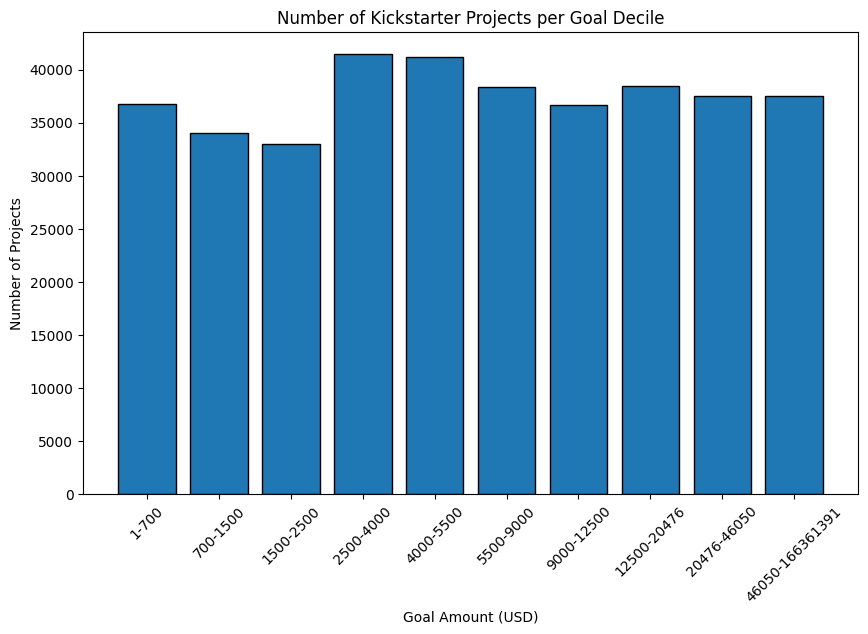

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Compute deciles
deciles = np.quantile(baseline_data['Goal'], np.linspace(0, 1, 11))

# Compute counts per decile
counts = []
for i in range(len(deciles)-1):
    count = ((baseline_data['Goal'] >= deciles[i]) & 
             (baseline_data['Goal'] < deciles[i+1])).sum()
    counts.append(count)

# Optional: include the max value in the last bin
counts[-1] += (baseline_data['Goal'] == deciles[-1]).sum()

# Bar positions (using the decile ranges as labels)
labels = [f'{int(deciles[i])}-{int(deciles[i+1])}' for i in range(len(deciles)-1)]

# Plot
plt.figure(figsize=(10,6))
plt.bar(labels, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Goal Amount (USD)')
plt.ylabel('Number of Projects')
plt.title('Number of Kickstarter Projects per Goal Decile')
plt.show()

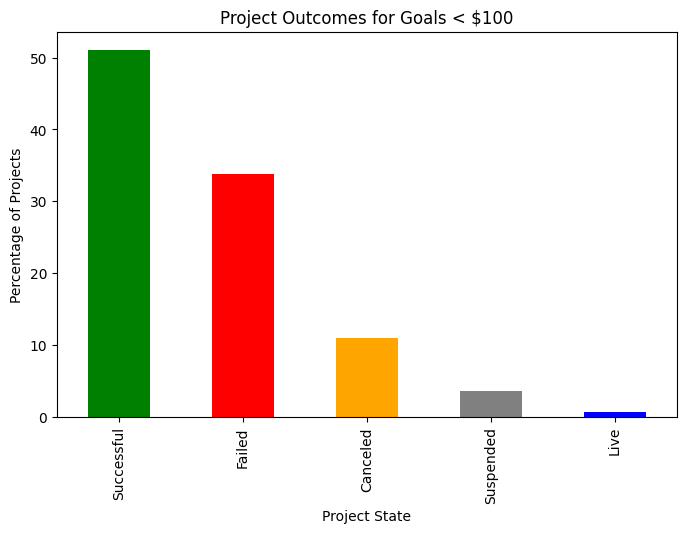

In [35]:
# Plot how many with a goal <100 USD are succesful in percentages
subset = baseline_data[baseline_data['Goal'] < 100]
success_counts = subset['State'].value_counts(normalize=True) * 100

# Map each label to a color
color_map = {
    'Successful': 'green',
    'Failed': 'red',
    'Canceled': 'orange',
    'Suspended': 'gray',
    'Live': 'blue'
}

# Create a list of colors in the same order as the value_counts index
colors = [color_map[label] for label in success_counts.index]

plt.figure(figsize=(8,5))
success_counts.plot(kind='bar', color=colors)
plt.xlabel('Project State')
plt.ylabel('Percentage of Projects')
plt.title('Project Outcomes for Goals < $100')
plt.show()

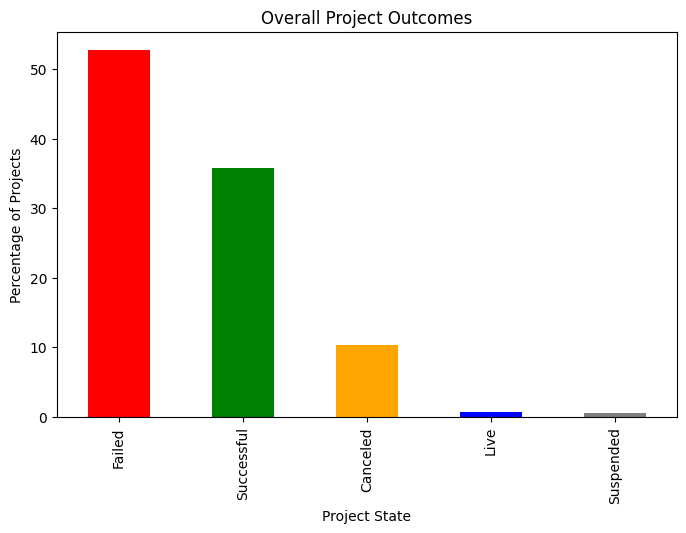

In [36]:
# Plot success rates for all projects in percent
overall_success_counts = baseline_data['State'].value_counts(normalize=True) * 100

# Create a list of colors in the same order as the value_counts index
colors_overall = [color_map[label] for label in overall_success_counts.index]

plt.figure(figsize=(8,5))
overall_success_counts.plot(kind='bar', color=colors_overall)
plt.xlabel('Project State')
plt.ylabel('Percentage of Projects')
plt.title('Overall Project Outcomes')
plt.show()

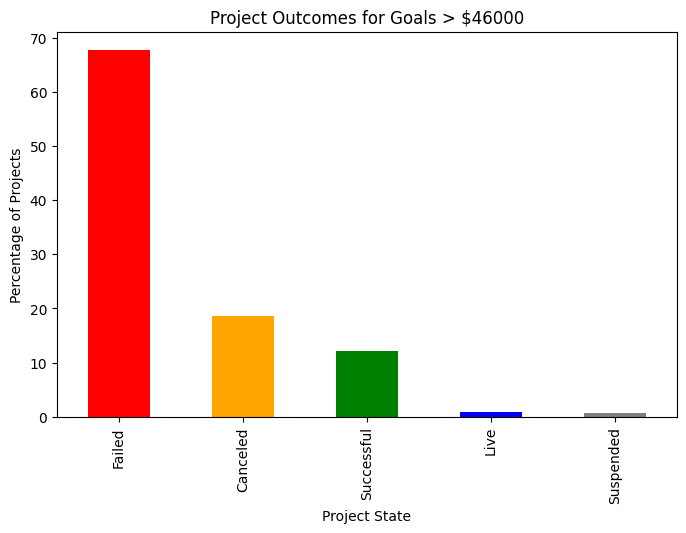

In [37]:
# Plot how many projects with a goal <100 USD are succesful in percentages
subset_big_boys = baseline_data[baseline_data['Goal'] > 46000]
success_counts_big_boys = subset_big_boys['State'].value_counts(normalize=True) * 100

# Create a list of colors in the same order as the value_counts index
colors_big_boys = [color_map[label] for label in success_counts_big_boys.index]

plt.figure(figsize=(8,5))
success_counts_big_boys.plot(kind='bar', color=colors_big_boys)
plt.xlabel('Project State')
plt.ylabel('Percentage of Projects')
plt.title('Project Outcomes for Goals > $46000')
plt.show()

We do not know the rules why a project gets suspended. Since we do not want to make any assumptions about this state and do not want it to create noise in the model, we decide to drop rows with the state "Suspended".

In [38]:
# Drop rows with state 'Suspended' in both datasets
baseline_data = baseline_data[baseline_data['State'] != 'Suspended']
advanced_data = advanced_data[advanced_data['State'] != 'Suspended']

In [39]:
# Check if 'Suspended' states are dropped in baseline data
baseline_data['State'].value_counts()

State
Failed        197608
Successful    133849
Canceled       38749
Live            2798
Name: count, dtype: int64

In [40]:
# Check if 'Suspended' states are dropped in advanced data
advanced_data['State'].value_counts()

State
Failed        197609
Successful    133849
Canceled       38749
Live            2798
Name: count, dtype: int64

In [41]:
# Check rows with state 'live' and 'Goal_Fulfillment' > 100% in baseline data
baseline_data[(baseline_data['State'] == 'Live') & (baseline_data['Goal_Fulfillment'] >= 100)]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
367924,The Evening Guests - Summerland LP,Music,United States,2017-11-03,2018-01-02,12000,12596,Live,104.97,60
367947,Tiddly Trailer Bar Co.,Food,United States,2017-11-03,2018-01-02,9500,9500,Live,100.00,60
368178,FRANTIC GOES WORLDWIDE !,Music,Belgium,2017-11-06,2018-01-05,4818,4926,Live,102.24,60
368201,Medieval Medicine: Humours!!,Music,United States,2017-11-06,2018-01-05,2000,2111,Live,105.55,60
368263,TT8 - The Best Wooden Multi-Functional Turntable,Technology,United States,2017-11-06,2018-01-03,25000,70731,Live,282.92,58
...,...,...,...,...,...,...,...,...,...,...
374792,Mobile Machine Learning: The Complete Masterclass,Technology,Canada,2018-01-01,2018-02-03,399,4475,Live,1121.55,33
374810,Magical Romance: Sailor Moon Couple Stained Gl...,Art,United Kingdom,2018-01-01,2018-01-21,887,1929,Live,217.47,20
374818,Make Earth Great Again #MEGA,Journalism,United States,2018-01-02,2018-01-26,17,27,Live,158.82,24
374822,100 Handmade Custom Shirts,Art,Mexico,2018-01-02,2018-01-17,26,31,Live,119.23,15


We assume that projects with the state 'Live', which are already completely funded (i.e. Goal_Fulfillment >= 100%) are succesful. Therefore, we change the state in all of the above rows.

In [42]:
# Replace rows with 'Goal_Fulfillment' > 100% and 'State' == 'Live' to 'Successful' in both datasets
baseline_data.loc[(baseline_data['State'] == 'Live') & (baseline_data['Goal_Fulfillment'] >= 100), 'State'] = 'Successful'
advanced_data.loc[(advanced_data['State'] == 'Live') & (advanced_data['Goal_Fulfillment'] >= 100), 'State'] = 'Successful'

The remaining rows with state = 'Live' do not provide any further information for the model build. Therefore, we will drop them as well.

In [43]:
# Drop all other rows with state 'Live' in both datasets
baseline_data = baseline_data[baseline_data['State'] != 'Live']
advanced_data = advanced_data[advanced_data['State'] != 'Live']

In [44]:
# Check values in state column after cleaning in baseline data
baseline_data['State'].value_counts()

State
Failed        197608
Successful    134290
Canceled       38749
Name: count, dtype: int64

In [45]:
# Check values in state column after cleaning in advanced data
advanced_data['State'].value_counts()

State
Failed        197609
Successful    134290
Canceled       38749
Name: count, dtype: int64

In [46]:
# Are there projects with the state = 'Canceled', which have a Goal_Fulfillment >= 100%?
baseline_data[(baseline_data['State'] == 'Canceled') & (baseline_data['Goal_Fulfillment'] >= 100)]

,Name,Category,Country,Launched,Deadline,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
58,Save the Ramzi (Canceled),Music,United States,2009-05-14,2009-06-15,1000,1190,Canceled,119.00,32
1106,Help Sex Piano Fund an EP (Canceled),Music,United States,2009-11-30,2010-02-15,750,1110,Canceled,148.00,77
3255,Tiny Urban Park (Canceled),Food,United States,2010-05-04,2010-05-18,650,1260,Canceled,193.85,14
6152,Pieces of My Soul: Scattered Around Chicago. (...,Photography,United States,2010-08-02,2010-10-31,60,160,Canceled,266.67,90
7604,Microfiche releasing Jetpacks and Laser Beams ...,Music,United States,2010-09-17,2010-10-23,1500,1905,Canceled,127.00,36
...,...,...,...,...,...,...,...,...,...,...
373114,Love Tove,Games,Sweden,2017-12-11,2018-01-10,3085,17433,Canceled,565.09,30
373240,Super Fun Awesome Time,Games,United States,2017-12-11,2018-01-25,1000,1729,Canceled,172.90,45
373378,ARTOFPXL VOL.1 // WEEKLY PLANNER 2018,Design,Germany,2017-12-12,2018-01-03,669,742,Canceled,110.91,22
373911,The Dumbest Thing In Your Mailbox - Part 5: Ye...,Art,United States,2017-12-18,2017-12-25,1,74,Canceled,7400.00,7


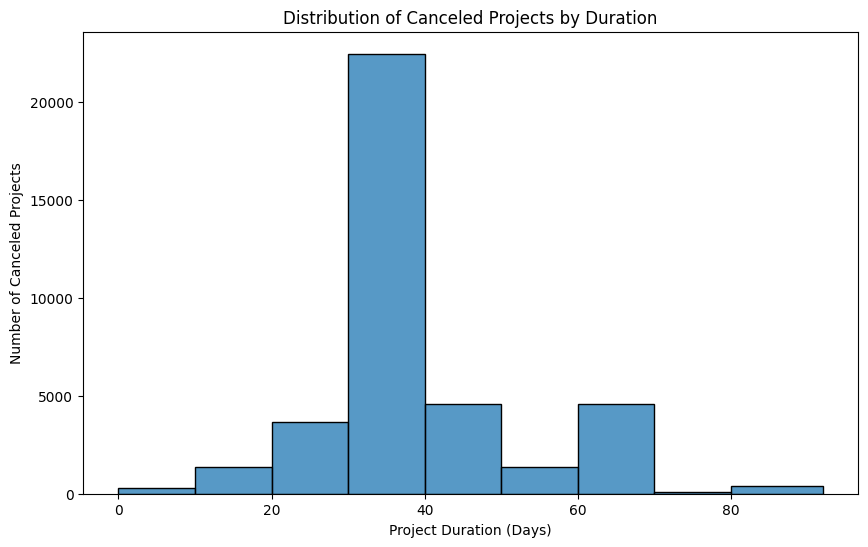

In [47]:
# Plot distribution of projects with state 'Canceled' vs 'Project_Duration_Days' in bins of 30, 60 and 90 days in baseline data
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(data=baseline_data[baseline_data['State'] == 'Canceled'], x='Project_Duration_Days', bins=[0,10,20,30,40,50,60,70,80,92])
plt.xlabel('Project Duration (Days)')
plt.ylabel('Number of Canceled Projects')
plt.title('Distribution of Canceled Projects by Duration')
plt.show()

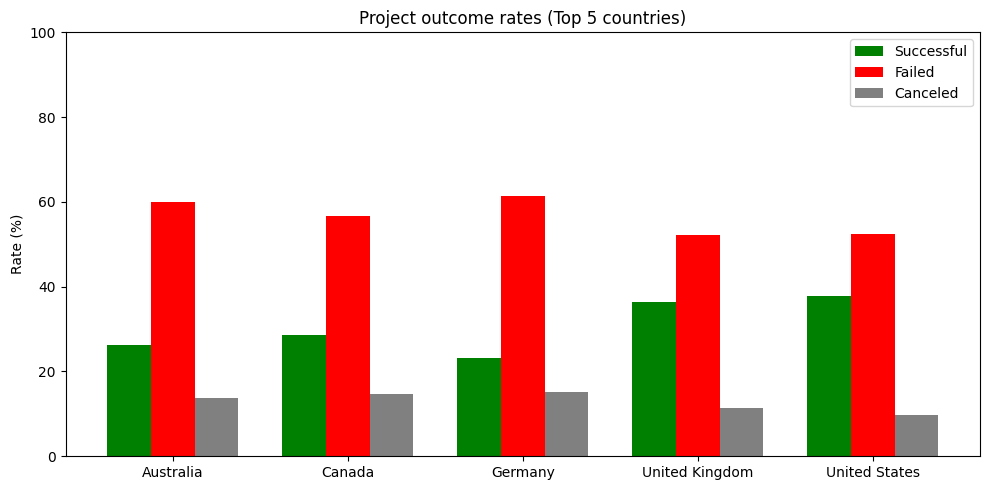

In [48]:
# Plot the distribution of different project outcomes (column 'State') for each 'Country' in percent
# df = your dataframe
df = baseline_data  # or whatever your df is called

# --- 1) Top 5 countries (most projects) ---
top5 = df["Country"].value_counts().head(5).index

# --- 2) Count states per country (only top5) ---
counts = (
    df[df["Country"].isin(top5)]
    .groupby(["Country", "State"])
    .size()
    .unstack(fill_value=0)
)

# ensure consistent order + missing columns handled
state_order = ["Successful", "Failed", "Canceled"]
counts = counts.reindex(columns=state_order, fill_value=0)

# --- 3) Convert to rates (%) ---
rates = counts.div(counts.sum(axis=1), axis=0) * 100

# --- 4) Grouped bar plot ---
x = np.arange(len(rates.index))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width, rates["Successful"], width, label="Successful", color="green")
ax.bar(x,         rates["Failed"],  width, label="Failed",  color="red")
ax.bar(x + width, rates["Canceled"],width, label="Canceled",color="gray")
ax.set_xticks(x)
ax.set_xticklabels(rates.index, rotation=0)
ax.set_ylabel("Rate (%)")
ax.set_title("Project outcome rates (Top 5 countries)")
ax.set_ylim(0, 100)
ax.legend()

plt.tight_layout()
plt.show()

Keep feature 'Country' since the distribution of 'State' is different depending on the country. Next action: OneHotEncoding in order to enhance model performance.

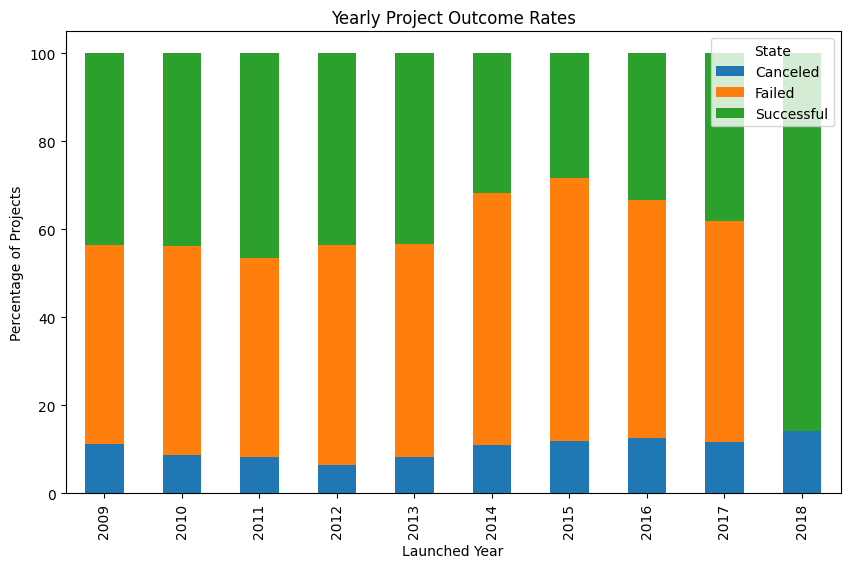

In [49]:
# Check success rates over the course of different years
baseline_data['Launched_Year'] = baseline_data['Launched'].dt.year
yearly_success_rates = baseline_data.groupby('Launched_Year')['State'].value_counts(normalize=True).unstack().fillna(0) * 100
yearly_success_rates.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Launched Year')
plt.ylabel('Percentage of Projects')
plt.title('Yearly Project Outcome Rates')
plt.show()

In [50]:
# check number of projects in Launched = 2018
baseline_data[baseline_data['Launched_Year'] == 2018].shape[0]

14

We observe that there is a high success rate in 2018. This is due to the relatively low number of projects launched in that yera (14). Since this subset does not really impact the overall data we decided drop these rows.

In [51]:
# Drop rows with 'Launched' = 2018 in both datasets
baseline_data = baseline_data[baseline_data['Launched'] != 2018]
advanced_data = advanced_data[advanced_data['Launched'] != 2018]

Based on the graph above we observe that there is no significant difference in the success rate over the course of the years. Therefore, it does not help us make predictions and does not add value when building the model.

In [52]:
# delete columns 'Launched', 'Launched_Year' and 'Deadline' in both datasets
baseline_data = baseline_data.drop(columns=['Launched', 'Launched_Year', 'Deadline'])
advanced_data = advanced_data.drop(columns=['Launched', 'Deadline'])

In [53]:
# Check baseline_data after cleaning
baseline_data.head()

,Name,Category,Country,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,United States,1000,625,Failed,62.50,40
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,United States,80000,22,Failed,0.03,88
2,drawing for dollars,Art,United States,20,35,Successful,175.00,9
3,Offline Wikipedia iPhone app,Technology,United States,99,145,Successful,146.46,80
4,Pantshirts,Fashion,United States,1900,387,Failed,20.37,29


In [54]:
# Check advanced_data after cleaning
advanced_data.head()

,Name,Category,Subcategory,Country,Goal,Pledged,Backers,State,Goal_Fulfillment,Project_Duration_Days
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,1000,625,30,Failed,62.50,40
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,80000,22,3,Failed,0.03,88
2,drawing for dollars,Art,Illustration,United States,20,35,3,Successful,175.00,9
3,Offline Wikipedia iPhone app,Technology,Software,United States,99,145,25,Successful,146.46,80
4,Pantshirts,Fashion,Fashion,United States,1900,387,10,Failed,20.37,29


Open topics:
- Category encoding - open
- Country encoding - Imbalance 70% USA? - open
- State Encoding - open
- Do we use the column "Names" and if yes, how? - open
- Scaling
- Target metric

Country
United States     0.780619
United Kingdom    0.089825
Canada            0.039365
Australia         0.020912
Germany           0.011127
France            0.007840
Italy             0.007678
Netherlands       0.007651
Spain             0.006072
Sweden            0.004687
Mexico            0.004674
New Zealand       0.003860
Denmark           0.002969
Ireland           0.002164
Switzerland       0.002027
Norway            0.001889
Hong Kong         0.001649
Belgium           0.001646
Austria           0.001593
Singapore         0.001481
Luxembourg        0.000165
Japan             0.000107

In [55]:
# clustering countries
America = ['United States', 'Canada', 'Mexico']
Europe = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Netherlands', 'Netherlands ', 'Sweden', 'Switzerland', 'Ireland', 'Belgium', 'Austria', 'Denmark', 'Norway', 'Finland', 'Luxembourg']
Oc_Asia = ['Singapore', 'Japan', 'Australia', 'New Zealand', 'Hong Kong']

# assign the baseline_data['Country'] to the continent clusters above
def assign_continent(country):
    if country in America:
        return 'America'
    elif country in Europe:
        return 'Europe'
    elif country in Oc_Asia:
        return 'Oc_Asia'
    else:
        return 'Other'
baseline_data['Continent'] = baseline_data['Country'].apply(assign_continent)
advanced_data['Continent'] = advanced_data['Country'].apply(assign_continent)

In [56]:
baseline_data['Continent'].value_counts()

Continent
America    306109
Europe      54289
Oc_Asia     10249
Name: count, dtype: int64

### Dealing with outliers (EDA)

In [57]:
baseline_data[(baseline_data['Goal'] > 250000) & (baseline_data['State'] == 'Successful')]

,Name,Category,Country,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days,Continent
42006,Double Fine Adventure,Games,United States,400000,3336372,Successful,834.09,34,America
45932,Wasteland 2,Games,United States,900000,2933252,Successful,325.92,35,America
48508,Make Leisure Suit Larry come again!,Games,United States,500000,655183,Successful,131.04,30,America
48870,Shadowrun Returns,Games,United States,400000,1836447,Successful,459.11,25,America
48884,Jane Jensen's Moebius and Pinkerton Road Studio,Games,United States,300000,435316,Successful,145.11,45,America
...,...,...,...,...,...,...,...,...,...
346335,Pathfinder: Kingmaker,Games,United States,500000,909057,Successful,181.81,36,America
347432,Neil deGrasse Tyson Presents: Space Odyssey - ...,Games,United States,314159,357866,Successful,113.91,46,America
353391,A Song of Ice & Fire: Tabletop Miniatures Game,Games,United States,300000,1690466,Successful,563.49,22,America
359105,The Cyanide & Happiness Adventure Game,Games,United States,300000,575377,Successful,191.79,30,America


In [58]:
baseline_data[baseline_data['Goal'] > 250000]

,Name,Category,Country,Goal,Pledged,State,Goal_Fulfillment,Project_Duration_Days,Continent
196,Support Independent Music: State of Man Tourin...,Music,United States,325000,175,Failed,0.05,44,America
514,Valley Cat,Film & Video,United States,1065000,110,Failed,0.01,90,America
2313,BECA ICAD (International Center for Art + Design),Art,United States,300000,2345,Failed,0.78,90,America
2410,"CHIHUANHAS 3D ""They're not just ankle biters a...",Film & Video,United States,750000,1369,Canceled,0.18,86,America
3032,Hollywood to Broadway Part 2 (The Million Doll...,Theater,United States,1000000,709,Failed,0.07,90,America
...,...,...,...,...,...,...,...,...,...
372783,The Smart Pillow,Technology,United States,1000000,0,Canceled,0.00,30,America
372896,Uprising Chronicles: The Gargoyle,Film & Video,United Kingdom,340994,0,Canceled,0.00,30,Europe
373138,#AirMyGlobalWarmingAd,Film & Video,United States,5500000,53794,Failed,0.98,12,America
373250,American Bidet - Cleans you way better than to...,Design,Canada,359453,2509,Canceled,0.70,50,America


## Feature engineering

There was no further cleaning reequired since there were no NA, 0 or other to be cleaned data left.

- Scaling

- Encoding, bin

- build pipelines for preprocessing

- build pipelines for models

### Note:

'Pledged' & 'Goal_Fulfillment' will not be used as features for the model since they already give information about the outcome of a project

In [59]:
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370647 entries, 0 to 374843
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Name                   370647 non-null  object 
 1   Category               370647 non-null  object 
 2   Country                370647 non-null  object 
 3   Goal                   370647 non-null  int64  
 4   Pledged                370647 non-null  int64  
 5   State                  370647 non-null  object 
 6   Goal_Fulfillment       370647 non-null  float64
 7   Project_Duration_Days  370647 non-null  int64  
 8   Continent              370647 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 28.3+ MB


In [60]:
# import all the feature engineering packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, mean_squared_error, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#import boosting packages
from xgboost import XGBClassifier
#import random forest, adaboost and gradient boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [61]:
baseline_data.columns

Index(['Name', 'Category', 'Country', 'Goal', 'Pledged', 'State',
       'Goal_Fulfillment', 'Project_Duration_Days', 'Continent'],
      dtype='object')

In [62]:
# encode target variable 'State' to numerical values: Successful = 1, Failed = 0, Canceled = 0
baseline_data.replace({'State' : {'Successful': 1, 'Failed': 0, 'Canceled': 0}} , inplace=True)
advanced_data.replace({'State' : {'Successful': 1, 'Failed': 0, 'Canceled': 0}} , inplace=True)

In [63]:
na_ilocs = np.where(baseline_data['Goal_Fulfillment'].isna())[0]
print(na_ilocs)

baseline_data.iloc[33770,:]
baseline_data.iloc[40230,:]


[]


Name                     Kibun Plush Doll (Canceled)
Category                                      Design
Country                                United States
Goal                                           15000
Pledged                                          340
State                                              0
Goal_Fulfillment                                2.27
Project_Duration_Days                             60
Continent                                    America
Name: 40297, dtype: object

In [64]:
#test-train split
X_bl = baseline_data.drop(columns=['State'])
y_bl = baseline_data['State']

X_bl_train, X_bl_test, y_bl_train, y_bl_test = train_test_split(X_bl, y_bl, test_size=0.2, random_state=42, stratify=y_bl)

X = advanced_data.drop(columns=['State'])
y = advanced_data['State']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
# OneHotEncoding for column 'Country' in baseline_data

num_f_bl = ['Goal', 'Project_Duration_Days']
cat_f_bl = ['Category', 'Continent']
cat_f_bl2 = ['Category', 'Country']

num_f_adv = ['Goal', 'Project_Duration_Days', 'Backers']
cat_f_adv = ['Category', 'Continent', 'Subcategory']
cat_f_adv2 = ['Category', 'Country', 'Subcategory']


log_pipe = Pipeline([
    ('log_transform', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

num_pipe2 = Pipeline([
    ('scaler', MinMaxScaler())
])

cat_pipe = Pipeline([
    ('encode', OneHotEncoder(drop='first', handle_unknown="infrequent_if_exist", min_frequency=0.01))
])

#bl preprocessors
preprocessor1 = ColumnTransformer([
    ('log_scaling', log_pipe, ['Goal']),
    ('num_scaling', num_pipe, ['Project_Duration_Days']),
    ('encoding', cat_pipe, cat_f_bl)
])

#country instead of continent
preprocessor2 = ColumnTransformer([
    ('log_scaling', log_pipe, ['Goal']),
    ('num_scaling', num_pipe, ['Project_Duration_Days']),
    ('encoding', cat_pipe, cat_f_bl2)
])

#minmax for num scaling
preprocessor3 = ColumnTransformer([
    ('log_scaling', log_pipe, ['Goal']),
    ('num_scaling', num_pipe2, ['Project_Duration_Days']),
    ('encoding', cat_pipe, cat_f_bl)
])


#advanced dataset preprocessors
preprocessor1_adv = ColumnTransformer([
    ('log_scaling', log_pipe, ['Goal', 'Backers']),
    ('num_scaling', num_pipe, ['Project_Duration_Days']),
    ('encoding', cat_pipe, ['Category', 'Continent', 'Subcategory'])
])

#all features with country instead of continent
preprocessor2_adv = ColumnTransformer([
    ('log_scaling', log_pipe, ['Goal', 'Backers']),
    ('num_scaling', num_pipe, ['Project_Duration_Days']),
    ('encoding', cat_pipe, ['Category', 'Country', 'Subcategory'])
])

#adv countries instead of continents and minmax scaling
preprocessor3_adv = ColumnTransformer([
    ('log_scaling', log_pipe, ['Goal', 'Backers']),
    ('num_scaling', num_pipe2, ['Project_Duration_Days']),
    ('encoding', cat_pipe, ['Category', 'Country', 'Subcategory'])
])


## Baseline Model training

Logistic Regression

In [66]:

model_bl = Pipeline([
    ('preprocessing', preprocessor1),
    ('classifier', LogisticRegression(max_iter=1000))
])

model_bl.fit(X_train, y_train)
y_pred_bl = model_bl.predict(X_train)
print('Precision of baseline model (with continents):', precision_score(y_train, y_pred_bl))

Precision of baseline model (with continents): 0.5784567857396492


In [67]:
# with country instead of continent
model_bl2 = Pipeline([
    ('preprocessing', preprocessor2),
    ('classifier', LogisticRegression(max_iter=1000))
])

model_bl2.fit(X_train, y_train)
y_pred_bl2 = model_bl2.predict(X_train)
print('Precision of baseline model (with countries):', precision_score(y_train, y_pred_bl2))


Precision of baseline model (with countries): 0.5786967288343984


In [68]:
print(recall_score(y_train, y_pred_bl2))
print(accuracy_score(y_train, y_pred_bl2))

0.3110618810037977
0.6683405391915499


In [69]:
print(classification_report(y_train, y_pred_bl))
print(recall_score(y_train, y_pred_bl))
print(accuracy_score(y_train, y_pred_bl))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77    189086
           1       0.58      0.30      0.40    107432

    accuracy                           0.67    296518
   macro avg       0.63      0.59      0.58    296518
weighted avg       0.65      0.67      0.64    296518

0.30327090624767294
0.6674940475788991


In [70]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_bl = cross_val_score(model_bl, X_bl_train, y_bl_train, cv=cv, scoring='recall')
print("Cross-validated recall scores:", cv_scores_bl)


KeyboardInterrupt: 

In [ ]:
model_bl.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('log_scaling',
                                    Pipeline(steps=[('log_transform',
                                                     FunctionTransformer(func=<ufunc 'log1p'>))]),
                                    ['Goal', 'Project_Duration_Days']),
                                   ('num_scaling',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['Goal', 'Project_Duration_Days']),
                                   ('encoding',
                                    Pipeline(steps=[('encode',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='infrequent_if_exist',
                                                                   min_frequency=0.01))]),
                                    ['Category', 'Continent'])])),


## Testing for different features

- Backers

- Subcategories

In [ ]:
#Gridsearch
param_grid_bl = {
    'preprocessing': [preprocessor1, preprocessor2, preprocessor3, preprocessor1_adv, preprocessor2_adv, preprocessor3_adv]
    #'classifier__C': [0.1, 1.0, 10.0],
    #'classifier__class_weight': [None, 'balanced']
}

gs_bl = GridSearchCV(model_bl, param_grid_bl, cv=cv, scoring='precision', n_jobs=-1)
gs_bl.fit(X_train, y_train)
y_pred_gs_bl = gs_bl.predict(X_train)
print(recall_score(y_train, y_pred_gs_bl))
print(precision_score(y_train, y_pred_gs_bl))

0.9192140144463474
0.8982526673882789


In [ ]:
model_bl2 = Pipeline([
    ('preprocessing', preprocessor2),
    ('classifier', LogisticRegression(max_iter=1000))
])
model_bl2.fit(X_train, y_train)
y_pred_bl2 = model_bl2.predict(X_train)

print('Precision of baseline model (with countries):', precision_score(y_train, y_pred_bl2))

Precision of baseline model (with countries): 0.5786967288343984


In [ ]:
print('Precision of baseline model (with continents):', precision_score(y_train, y_pred_bl))

Precision of baseline model (with continents): 0.5784567857396492


In [ ]:
model_bl3 = Pipeline([
    ('preprocessing', preprocessor3),
    ('classifier', LogisticRegression(max_iter=1000))
])
model_bl3.fit(X_train, y_train)
y_pred_bl3 = model_bl3.predict(X_train)

print('Precision of baseline model (with countries) minmax scaling:', precision_score(y_train, y_pred_bl3))

Precision of baseline model (with countries) minmax scaling: 0.5785370531512493


In [ ]:
model_bl_adv1 = Pipeline([
    ('preprocessing', preprocessor1_adv),
    ('classifier', LogisticRegression(max_iter=1000))
])
model_bl_adv1.fit(X_train, y_train)
y_pred_bl_adv1 = model_bl_adv1.predict(X_train)

print('Precision of advanced model (with continents):', precision_score(y_train, y_pred_bl_adv1))

Precision of advanced model (with continents): 0.8967931407581171


In [ ]:
model_bl_adv2 = Pipeline([
    ('preprocessing', preprocessor2_adv),
    ('classifier', LogisticRegression(max_iter=1000))
])

model_bl_adv2.fit(X_train, y_train)
y_pred_bl_adv2 = model_bl_adv2.predict(X_train)

print('Precision of advanced dataset (with countries):', precision_score(y_train, y_pred_bl_adv2))


Precision of advanced dataset (with countries): 0.8968028806808882


In [ ]:
cv_bl_adv_2 = cross_val_score(model_bl_adv2, X_train, y_train, cv=cv, scoring='precision')
print("Cross-validated precision scores (advanced model with country and minmax):", cv_bl_adv_2)

Cross-validated precision scores (advanced model with country and minmax): [0.89990415 0.89817256 0.89740095 0.89917001 0.89615385]


In [ ]:
model_adv3 = Pipeline([
    ('preprocessing', preprocessor3_adv),
    ('classifier', LogisticRegression(max_iter=1000))
])

model_adv3.fit(X_train, y_train)
y_pred_adv3 = model_adv3.predict(X_train)
print('Precision of advanced model without backers (with countries):', precision_score(y_train, y_pred_adv3))

Precision of advanced model without backers (with countries): 0.8968056957363812


### Outcomes:

Use country instead of continent

Log transform performs much better than without

Subcategories performs best with prediction

--> preprocessor3_adv to be used as preprocessor

## Tuning

1. Preprocessor tuning (GS for preprocessors)

2. use best_estimator_ model from 1. for GS: hyperparameter tuning


### Change:

- Preprocessing (pipelines)
    - baseline dataset
    - advanced dataset: use additional features 'Subcategories', 'Backers'

- Hyperparameter (gridsearch)

### ML algorithms
- different classifiers:

    - Decision tree 
    - random forest
    - KNN
    - Logistic Regression
    - XGboost
    






### Model 1: Decision Tree


In [ ]:
model_dt1 = Pipeline([
    ('preprocessing', preprocessor1),
    ('classifier', DecisionTreeClassifier())
])

model_dt1.fit(X_train, y_train)
y_pred_dt1 = model_dt1.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred_dt1))
print(recall_score(y_train, y_pred_dt1))
print(accuracy_score(y_train, y_pred_dt1))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85    189086
           1       0.81      0.58      0.67    107432

    accuracy                           0.80    296518
   macro avg       0.80      0.75      0.76    296518
weighted avg       0.80      0.80      0.79    296518

0.5793059795963958
0.7976783871468174


In [ ]:
cv_scores1 = cross_val_score(model_dt1, X_train, y_train, cv=cv, scoring='precision')
print("Cross-validated precision scores for Decision Tree:", cv_scores1)

Cross-validated recall scores for Decision Tree: [0.37404012 0.37078233 0.36833287 0.37359211 0.37214931]


In [ ]:
param_grid_bl = {
    'preprocessing': [preprocessor1, preprocessor2, preprocessor3, preprocessor1_adv, preprocessor2_adv, preprocessor3_adv]
}


In [ ]:
#gridsearch for preprocessor
#gs_dt = GridSearchCV(model1, param_grid_bl, cv=cv, scoring='precision', n_jobs=-1)
#gs_dt.fit(X_train, y_train)
#y_pred_dt_gs = gs_dt.predict(X_train)
#print('Precision of decision tree with grid search for preprocessor:', precision_score(y_train, y_pred_dt_gs))  

# outcome: preprocessor3_adv is the best preprocessor

Precision of decision tree with grid search for preprocessor: 0.9974688308633263


In [ ]:
#best preprocessor model for decision tree
model_dt_best = Pipeline([
    ('preprocessing', preprocessor3_adv),
    ('classifier', DecisionTreeClassifier())
])
model_dt_best.fit(X_train, y_train)
y_pred_dt_best = model_dt_best.predict(X_train)
print('Precision of decision tree with best preprocessor:', precision_score(y_train, y_pred_dt_best))

In [ ]:
# best model in terms of preprocessor from gridsearch
#gs_dt.fit(X_train, y_train)
#model_dt_best = gs_dt.best_estimator_
#y_pred_dt_best = model_dt_best.predict(X_train)
#print('Precision of best decision tree model:', precision_score(y_train, y_pred_dt_best))

Precision of best decision tree model: 0.9974688308633263


In [ ]:
#cv_scores_dt_best = cross_val_score(gs_dt.best_estimator_, X_train, y_train, cv=cv, scoring='precision')
cv_score_dt_best = cross_val_score(model_dt3, X_train, y_train, cv=cv, scoring='precision')
print("Cross-validated precision scores for best decision tree model:", cv_score_dt_best)

In [ ]:
# get depth of the best decision tree model for preprocessor3_adv
print(model_dt_best.named_steps['classifier'].get_depth())


48


In [93]:
# hyperparameter tuning for decision tree
param_grid_dt = {
    #'preprocessing': [preprocessor1, preprocessor2, preprocessor3, preprocessor1_adv, preprocessor2_adv, preprocessor3_adv],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [1 ,2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

In [100]:
gs_dt_hpt = GridSearchCV(model_dt_best, param_grid_dt, cv=cv, scoring='precision', n_jobs=-1)
#model_dt_final = gs_dt_hpt.best_estimator_

In [ ]:
gs_dt_hpt.fit(X_train, y_train)
model_dt_final = gs_dt_hpt.best_estimator_

/Users/kevin/Documents/bootcamp_ai/week8/ml-project/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kevin/Documents/bootcamp_ai/week8/ml-project/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kevin/Documents/bootcamp_ai/week8/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/kevin/Docume

In [ ]:
cv_scores_dt_final = cross_val_score(model_dt_final, X_train, y_train, cv=cv, scoring='precision')
print("Cross-validated precision scores for final decision tree model:", cv_scores_dt_final)

In [ ]:
model_dt_final.fit(X_train, y_train)
#this precision score will not give much information since it compares predicted data of the training data (overfit problem)
y_pred_dt_final = model_dt_final.predict(X_train)
print('Precision of final decision tree model after hyperparameter tuning:', precision_score(y_train, y_pred_dt_final))
#how to get the precision score of model_dt_final TODO

### Model 2: Random Forest



### Model 3: KNN



### Model 4: Logistic Regression



In [95]:
model_lr1 = Pipeline([
    ('preprocessing', preprocessor1),
    ('classifier', LogisticRegression(max_iter=1000))
])
model_lr1.fit(X_train, y_train)
y_pred_lr1 = model_lr1.predict(X_train)
print('Precision of logistic regression model 1:', precision_score(y_train, y_pred_lr1))

Precision of logistic regression model 1: 0.5784567857396492


In [96]:
cv_scores_lr1 = cross_val_score(model_lr1, X_train, y_train, cv=cv, scoring='precision')
print("Cross-validated precision scores for logistic regression model:", cv_scores_lr1)

Cross-validated precision scores for logistic regression model: [0.5782088  0.58080086 0.57453581 0.58281278 0.5767843 ]


In [97]:
#gridsearch for preprocessor
param_grid_lr = {
    'preprocessing': [preprocessor1, preprocessor2, preprocessor3, preprocessor1_adv, preprocessor2_adv, preprocessor3_adv]
}                 

In [98]:
#gridsearch best preprocessor
gs_lr1_best = GridSearchCV(model_lr1, param_grid_lr, cv=cv, scoring='precision', n_jobs=-1)
gs_lr1_best.fit(X_train, y_train)
model_lr1_best = gs_lr1_best.best_estimator_
y_pred_lr1_best = model_lr1_best.predict(X_train)
print('Precision of best logistic regression model after gridsearch for preprocessor:', precision_score(y_train, y_pred_lr1_best))

Precision of best logistic regression model after gridsearch for preprocessor: 0.8967931407581171


In [99]:
cv_scores_lr1_best = cross_val_score(model_lr1_best, X_train, y_train, cv=cv, scoring='precision')
print("Cross-validated precision scores for best preprocessor logistic regression model:", cv_scores_lr1_best)

Cross-validated precision scores for best preprocessor logistic regression model: [0.89781954 0.89737058 0.89540585 0.89854081 0.89468451]


In [100]:
#gridsearch best hyperparameters
param_grid_lr_final = [
    {  # L2 models
        "classifier__penalty": ["l2"],
        "classifier__solver": ["lbfgs"],
        "classifier__C": [0.1, 1, 10, 100],
    },
    {  # Elastic Net models
        "classifier__penalty": ["elasticnet"],
        "classifier__solver": ["saga"],
        "classifier__C": [0.1, 1, 10],
        "classifier__l1_ratio": [0.2, 0.5, 0.8],
    }
]

In [101]:
gs_lr1_final = GridSearchCV(model_lr1_best, param_grid_lr_final, cv=cv, scoring= 'precision', n_jobs=-1)
gs_lr1_final.fit(X_train, y_train)
model_lr1_final = gs_lr1_final.best_estimator_
y_pred_lr1_final = model_lr1_final.predict(X_train)
print('Precision of final logistic regression model after 2*gridsearch:', precision_score(y_train, y_pred_lr1_final))

Precision of final logistic regression model after 2*gridsearch: 0.8967884485988107


In [102]:
#last cross val of final
cv_scores_lr1_final = cross_val_score(model_lr1_final, X_train, y_train, cv=cv, scoring='precision')
print("Cross-validated precision scores for final logistic regression model:", cv_scores_lr1_final)

Cross-validated precision scores for final logistic regression model: [0.89790612 0.89746156 0.89543226 0.8984635  0.89467498]


In [ ]:
#save models with pickle
import pickle

#pickle.dump(model_lr1_best, open('model_lr1_best.sav', 'wb'))
#pickle.dump(model_lr1_final, open('model_lr1_final.sav', 'wb'))

### Model 5: XGBoost



# Limitations

- definition of 'success'
- is the model reproducing 'trends'?
- lack of information about the impact/meaning of the project
- data is not well balanced when it comes to continent distribution
- is it valid to use the overall data when it comes to countries? are these comparable?